In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
df = pd.read_csv('files/hits.csv')
df.head(3)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.groupby("Genre").size()

In [ ]:
data = df.loc[:, ["Genre", "Popularity", "Year"]]
data.fillna(0, inplace=True)
data

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="Year", y="Popularity", hue="Genre")
plt.legend(loc="center", bbox_to_anchor=(1.2, 0.5))
plt.show()

In [8]:
pop = data[data["Genre"] == "Pop"]

In [9]:
pv = pop.pivot_table(index="Year", columns="Genre", values="Popularity")

In [ ]:
pv.sort_values(by="Year", ascending=True, axis=0)

In [11]:
x = pv.index
y = np.array(pv["Pop"])

xtrain, xtest = x[:int(len(x) * 0.8)], x[int(len(x) * 0.8):]
ytrain, ytest = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]

In [ ]:
plt.scatter(xtrain, ytrain, color="blue")
plt.show()

In [ ]:
ytrain

In [19]:
# ytrain = y
# xtrain = x

m = 1
b = 1
lr = 0
ud = 0
wi = 1
he = 1
mx = 1
my = 1
valid_err = 19.35
err = best_err = err_ant = 1e50

best = [m, b, lr, ud, wi, he, mx, my]

def mf(x):
    x = (x + lr) * wi * mx
    # res = m*x + b
    res = m*(x**3)
    res = (res + ud) * he * my
    return res

def error(y_hat):
    return np.sum((ytrain - y_hat)**2) / len(y)

n = 1000

i = 0
# for i in range(n):
while True:
    i += 1
    y_hat = mf(xtrain)
    err = error(y_hat)

    # print(f"{best_err} -> {err}", err < best_err)
    if err < best_err:
        print(f"b: {round(b, 2)} m: {round(m, 2)} lr: {round(lr, 2)} ud: {round(ud, 2)} wi: {round(wi, 2)} he: {round(he, 2)} mx: {round(mx, 2)} my: {round(my, 2)} error: {round(err, 2)}")
        # print(f"{best_err} -> {err}", err < best_err)
        best = [m, b, lr, ud, wi, he, mx, my]
        best_err = err
    else:
        m = best[0] + random.uniform(-0.1, 0.1)
        b = best[1] + random.uniform(-0.1, 0.1)
        lr = best[2] + random.uniform(-0.1, 0.1)
        ud = best[3] + random.uniform(-0.1, 0.1)
        wi = best[4] + random.uniform(-0.1, 0.1)
        he = best[5] + random.uniform(-0.1, 0.1)
        mx = best[6] + random.uniform(-0.1, 0.1)
        my = best[7] + random.uniform(-0.1, 0.1)
    
    err_ant = err
    
    if err <= valid_err:
        print("r: ", round(m, 2), round(b, 2), round(lr, 2), round(ud, 2), round(wi, 2), round(he, 2), round(mx, 2), round(my, 2))
        break

m, b, lr, ud, wi, he, mx, my = best
y_hat = mf(xtrain)
err = error(y_hat)

print(f"{i}: b: {round(b, 2)} m: {round(m, 2)} lr: {round(lr, 2)} ud: {round(ud, 2)} wi: {round(wi, 2)} he: {round(he, 2)} mx: {round(mx, 2)} my: {round(my, 2)} error: {round(err, 2)}")




b: 1 m: 1 lr: 0 ud: 0 wi: 1 he: 1 mx: 1 my: 1 error: 4.671427713246058e+19
b: 1.04 m: 1.03 lr: 0.08 ud: 0.02 wi: 0.91 he: 1.04 mx: 0.91 my: 1.0 error: 1.6939584710521854e+19
b: 1.09 m: 0.95 lr: 0.13 ud: -0.02 wi: 0.81 he: 1.09 mx: 0.86 my: 0.94 error: 5.356342074853616e+18
b: 1.13 m: 0.91 lr: 0.12 ud: -0.01 wi: 0.87 he: 1.05 mx: 0.81 my: 1.0 error: 5.128021383131473e+18
b: 1.04 m: 0.97 lr: 0.15 ud: -0.07 wi: 0.79 he: 1.12 mx: 0.8 my: 1.07 error: 4.05662365556079e+18
b: 1.04 m: 0.96 lr: 0.06 ud: -0.07 wi: 0.84 he: 1.11 mx: 0.72 my: 1.11 error: 2.9008951370766387e+18
b: 0.96 m: 1.01 lr: 0.02 ud: 0.0 wi: 0.75 he: 1.15 mx: 0.68 my: 1.01 error: 1.0728586861145306e+18
b: 0.89 m: 0.94 lr: -0.03 ud: -0.05 wi: 0.78 he: 1.1 mx: 0.65 my: 0.96 error: 7.501668620517755e+17
b: 0.8 m: 0.96 lr: 0.04 ud: 0.01 wi: 0.73 he: 1.17 mx: 0.66 my: 0.95 error: 6.552649422550963e+17
b: 0.82 m: 1.0 lr: 0.06 ud: 0.02 wi: 0.7 he: 1.16 mx: 0.61 my: 0.91 error: 3.162733417806894e+17
b: 0.86 m: 0.93 lr: 0.03 ud: 0.04 

In [ ]:
def mt(x):
    x = (x + lr) * wi * mx
    # r = m*x + b
    res = m*(x**3)
    res = (res + ud) * he * my
    return res

xt = np.linspace(-10, 10, 100)
yt = mt(xt)
plt.plot(xt, yt, color="red")
plt.show()

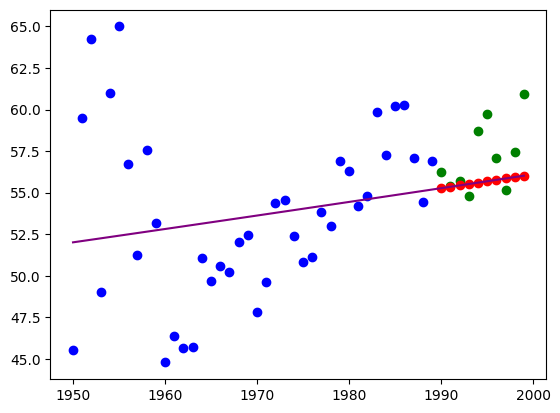

In [20]:
xo = x.copy()
yo = mf(xo)

yrest = mf(xtest)
plt.scatter(xtrain, ytrain, color="blue")
plt.scatter(xtest, ytest, color="green")
plt.scatter(xtest, yrest, color="red")
plt.plot(xo, yo, color='purple')
plt.show()